In [1]:
import Input_template
from Input_template import *

In [7]:
## boundary files
district_boundary = "workdir/extra_inputs/shp_district/shp_district.shp"
village = "workdir/extra_inputs/shp_settlement/shp_settlement.shp"
taluk = "workdir/extra_inputs/shp_taluk/shp_taluk.shp"

In [ ]:
shp_settlement  = read_df_UT(settlement)
shp_district = read_df_UT(district)
shp_taluk = read_df_UT(taluk)

In [ ]:
population_raster = "D:\\Lila_Kallakuruchi\\workdir\\raster\\population_10_lon_70_general-v1.5.tif"
common_raster = get_rooted("data/kallakurichi/LC_w_urban_w_waterbod_proj32644.tif")

In [11]:
year_2019 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2019_32644.tif"
year_2020 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_32644.tif"
year_2021 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_32644.tif"

# Cutting the raster

In [155]:
UTMEPSG = 32644
shpgdf = shp_district
shpgdf =shpgdf.to_crs(epsg=UTMEPSG)

output ='D:\\Lila_Kallakuruchi\\workdir\\temp_cr.shp'

LandUsefile_utm =common_raster

df2 = shpgdf

temp = LandUsefile_utm[:-4] + "_cut.tif"
# copy_raster(LandUsefile_utm,temp)
 
df = pd.DataFrame()   
for j in range(len(df2)):
    input_shp =  'D:\\Lila_Kallakuruchi\\workdir\\temp_cr.shp'

    selection = df2.geometry[j:j+1]
    if selection.geometry.is_empty.bool():
        rasterarr = []
    else:
        selection.to_file(input_shp)

        #first for LandUse raster 
        input_raster= LandUsefile_utm

        output_raster = temp

        ds = gdal.Warp(output_raster,
                      input_raster,
                      format = 'GTiff',
                      cutlineDSName = input_shp,
                      cropToCutline=True,
                      )
        ds = None

## Changing the crs

In [156]:
raster_ds = gdal.Open("D:/Lila_Kallakuruchi/data/kallakurichi/LC_w_urban_w_waterbod_proj32644_cut.tif")


target_crs = osr.SpatialReference()
target_crs.ImportFromEPSG(4326) 


output_ds = gdal.Warp("D:/Lila_Kallakuruchi/data/kallakurichi/common_raster_4326.tif", raster_ds, dstSRS=target_crs)

# Close the input and output raster datasets
raster_ds = None
output_ds = None

# Analysis

In [12]:
# Open input files using GDAL
year1_ds = gdal.Open(year_2019)
year2_ds = gdal.Open(year_2020)
year3_ds = gdal.Open(year_2021)

# Get raster geotransform
geotransform = year1_ds.GetGeoTransform()

# Calculate pixel size
pixel_width = abs(geotransform[1])
pixel_height = abs(geotransform[5])
pixel_size = pixel_width * pixel_height

# Read in raster data as arrays
year1_data = year1_ds.GetRasterBand(1).ReadAsArray()
year2_data = year2_ds.GetRasterBand(1).ReadAsArray()
year3_data = year3_ds.GetRasterBand(1).ReadAsArray()


# Create a boolean mask where 0 values are False and non-zero values are True
year1_mask = year1_data > 0
year2_mask = year2_data > 0
year3_mask = year3_data > 0

# Apply the mask to the original array to create a new array with only non-zero values
year1_data = year1_data[year1_mask]
year2_data = year2_data[year2_mask]
year3_data = year3_data[year3_mask]

# Get unique values and their counts for each year
unique_values_year1, counts_year1 = np.unique(year1_data, return_counts=True)
unique_values_year2, counts_year2 = np.unique(year2_data, return_counts=True)
unique_values_year3, counts_year3 = np.unique(year3_data, return_counts=True)

# Create dataframes
df1 = pd.DataFrame(columns=["Year", "Value", "Count", "Area"])
df2 = pd.DataFrame(columns=["Year", "Value", "Count", "Area"])
df3 = pd.DataFrame(columns=["Year", "Value", "Count", "Area"])

# Add data for Year 1
for value, count in zip(unique_values_year1, counts_year1):
    area = count * pixel_size
    area = (area/10**6)*247.105
    df1 = df1.append({"Year": "Year 1", "Value": value, "Count": count, "Area": area}, ignore_index=True)

# Add data for Year 2
for value, count in zip(unique_values_year2, counts_year2):
    area = count * pixel_size
    area = (area/10**6)*247.105
    df2 = df2.append({"Year": "Year 2", "Value": value, "Count": count, "Area": area}, ignore_index=True)

# Add data for Year 3
for value, count in zip(unique_values_year3, counts_year3):
    area = count * pixel_size
    area = (area/10**6)*247.105
    df3 = df3.append({"Year": "Year 3", "Value": value, "Count": count, "Area": area}, ignore_index=True)

# Concatenate DataFrames vertically
df_concat = pd.concat([df1, df2, df3])

# Reshape DataFrame using pivot() method
df_pivot = df_concat.pivot(index="Value", columns="Year", values="Area")

# Reset index to make "Value" a column
df_final = df_pivot.reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_1292\4079001656.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"Year": "Year 1", "Value": value, "Count": count, "Area": area}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1292\4079001656.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"Year": "Year 1", "Value": value, "Count": count, "Area": area}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1292\4079001656.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"Year": "Year 1", "Value": value, "Count": count, "Area": area}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1292\4079001656.py:44: FutureWarning: The frame.

In [13]:
df_final

Year,Value,Year 1,Year 2,Year 3
0,1.0,317392.767818,245857.838720,202897.718325
1,2.0,50157.718561,53563.964891,50621.703479
2,3.0,195066.218311,265547.939206,236278.438129
3,4.0,162646.581880,165894.377460,243716.727236
4,5.0,51844.433226,52217.677165,47458.619249
5,6.0,9304.113416,3313.330731,5381.790125
6,7.0,15156.115781,15005.375048,15194.567024


In [14]:
df_final.to_excel(get_in_output("raster/3_year_analysis.xlsx"))

# Settlement Analysis


## Three year analysis

In [14]:
def extract_land_cover_info(df, raster_files):
    # Convert shapefile to projected coordinate system
    df = df.to_crs(32644)

    # Create empty dataframe for land cover data
    LC_data = pd.DataFrame()

    for raster_file in raster_files:
        # Open input raster file using GDAL
        raster = gdal.Open(raster_file)

        # Get raster geotransform and pixel size
        transform = raster.GetGeoTransform()
        pixel_size = abs(transform[1] * transform[5])

        data = raster.GetRasterBand(1).ReadAsArray()
        data_mask = data > 0
        data = data[data_mask]
        # Define unique values to be extracted from the raster
        unique_values = np.unique(data)
        for value in unique_values:
            LC_data[f"LC_{value}_{raster_file[-14:-10]}"] = 0

            for j in range(len(df)):
                input_shp = "temp.shp"
                selection = df.geometry[j:j+1]

                if selection.geometry.is_empty.bool():
                    rasterarr = []
                else:
                    selection.to_file(input_shp)

                    # Warp raster to match shapefile
                    output_raster = "temp.tif"
                    ds = gdal.Warp(output_raster,
                                   raster_file,
                                   format='GTiff',
                                   cutlineDSName=input_shp,
                                   cropToCutline=True)
                    ds = None

                    raster = gdal.Open(output_raster, gdal.GA_ReadOnly)
                    rasterarr = raster.ReadAsArray()

                    rasterarr = np.where(rasterarr <= 0, np.nan, rasterarr)
                    rasterarr = rasterarr[~np.isnan(rasterarr)]

                    count = np.count_nonzero(rasterarr == value)

                    area = count * pixel_size
                    area = (area/10**6)*247.105
                    

                    LC_data.at[j, f"LC_{value}_{raster_file[-14:-10]}"] = area

    shp_settlement_final = pd.concat([df, LC_data], axis=1)

    return shp_settlement_final



# settlement level

In [15]:
raster_files = [year_2019,year_2020,year_2021]
result = extract_land_cover_info(shp_settlement, raster_files)

In [20]:
result[['LC_1.0_2019', 'LC_2.0_2019', 'LC_3.0_2019', 'LC_4.0_2019',
       'LC_5.0_2019', 'LC_6.0_2019', 'LC_7.0_2019', 'LC_1.0_2021', 'LC_2.0_2021',
       'LC_3.0_2021', 'LC_4.0_2021', 'LC_5.0_2021', 'LC_6.0_2021',
       'LC_7.0_2021']]

,LC_1.0_2019,LC_2.0_2019,LC_3.0_2019,LC_4.0_2019,LC_5.0_2019,LC_6.0_2019,LC_7.0_2019,LC_1.0_2021,LC_2.0_2021,LC_3.0_2021,LC_4.0_2021,LC_5.0_2021,LC_6.0_2021,LC_7.0_2021
0,1624.342599,202.73393,1289.549902,900.885927,443.128331,526.653524,369.092391,808.266867,214.892035,1352.910433,1844.275799,387.477818,378.581644,369.487777


In [18]:
# result.to_file(get_in_output("raster/3_year_settlement_analysis"))

C:\Users\User\AppData\Local\Temp\ipykernel_1292\711233999.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result.to_file(get_in_output("raster/3_year_settlement_analysis"))


In [19]:
# result.drop("geometry",axis =1,inplace =True)

In [20]:
# result.to_excel(get_in_output("raster/3_year_settlement_analysis.xlsx"))

# Taluk 

In [21]:
Taluk_results = extract_land_cover_info(shp_taluk, raster_files)

In [22]:
# Taluk_results.to_file(get_in_output("raster/3_year_taluk_level_analysis"))

C:\Users\User\AppData\Local\Temp\ipykernel_1292\1287781108.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Taluk_results.to_file(get_in_output("raster/3_year_taluk_level_analysis"))


In [23]:
# Taluk_results.drop("geometry",axis =1,inplace =True)

In [24]:
# Taluk_results.to_excel(get_in_output("raster/3_year_taluk_level_analysis.xlsx"))

# Visual


### we have to use raster with crs 4326

In [ ]:
year_2019_4326 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2019_4326.tif"
year_2020_4326 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326.tif"
year_2021_4326 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326.tif"

### Removing no data values 

In [16]:
land_cover = get_rooted("workdir/raster/land_cover.tif")
common_raster_4326 = get_rooted("data/kallakurichi/common_raster_4326.tif")

In [158]:
import numpy as np
from osgeo import gdal

# Load the raster data
raster_file = common_raster_4326
raster_ds = gdal.Open(raster_file)
raster_array = raster_ds.ReadAsArray()

# Replace NaN and negative values with a NoData value
nodata_value = -9999
raster_array[np.isnan(raster_array) | (raster_array < 0)] = nodata_value

# Create a new raster file with the cleaned data
driver = gdal.GetDriverByName('GTiff')
output_file = raster_file[:-4] +"_new.tif" ### new file 
output_ds = driver.Create(output_file, raster_ds.RasterXSize, raster_ds.RasterYSize, 1, gdal.GDT_Float32)
output_ds.SetProjection(raster_ds.GetProjection())
output_ds.SetGeoTransform(raster_ds.GetGeoTransform())
output_band = output_ds.GetRasterBand(1)
output_band.SetNoDataValue(nodata_value)
output_band.WriteArray(raster_array)
output_band.FlushCache()

# Close the datasets
raster_ds = None
output_ds = None

In [6]:
year_2019_new = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2019_4326_new.tif"
year_2020_new = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_new.tif"
year_2021_new = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_new.tif"

In [18]:
common_raster_4326_new = get_rooted("data/kallakurichi/common_raster_4326_new.tif")

In [19]:
lc_2019 = rasterio.open(year_2019_new)
lc_2020  = rasterio.open(year_2020_new)
lc_2021 = rasterio.open(year_2021_new)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

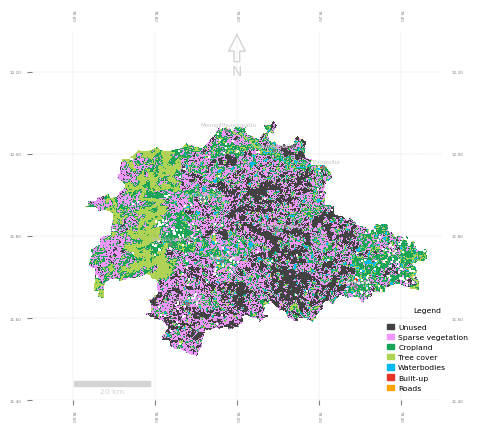

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

with rasterio.open(year_2019_new) as src:
    data = src.read(1)
# Create a color map for the categories
category_codes = {0: {'name': 'Unused', 'color': '#424242'},
                  1: {'name': 'Sparse-veg', 'color': '#f096ff'},
                  2: {'name': 'Cropland', 'color': '#18a558'},
                  3: {'name': 'Tree cover', 'color': '#B1D355'},
                  4: {'name': 'Water', 'color': '#00B9F2'},
                  5: {'name': 'Built-up', 'color': '#e73429'},
                  6: {'name': 'Roads', 'color': 'orange'}
                 }
cmap = mpl.colors.ListedColormap([v['color'] for k, v in category_codes.items()])

# Create a masked array to ignore nodata values
data_masked = np.ma.masked_where(data <= 0, data)

# Plot the raster data with colors based on the categories
fig, ax = plt.subplots()
plot_common_features(fig, ax)
plot_cities(fig, ax)
image = rasterio.plot.show(data_masked,transform=lc_2019.transform,
                      ax=ax,
                      cmap=cmap, 
                      )
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="orange", label = 'Roads')

    
plt.legend(handles = [Unused, SpV, Crop, TC, Water, BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


# Show the plot
plt.savefig(get_in_output("images/raster/LC_2019.jpg"),dpi =1500)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

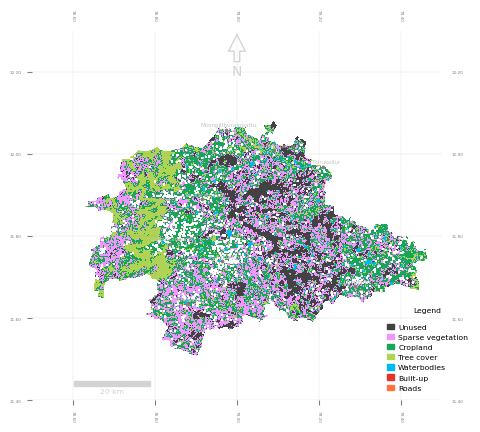

In [90]:

with rasterio.open(year_2020_new) as src:
    data = src.read(1)
# Create a color map for the categories
category_codes = {0: {'name': 'Unused', 'color': '#424242'},
                  1: {'name': 'Sparse-veg', 'color': '#f096ff'},
                  2: {'name': 'Cropland', 'color': '#18a558'},
                  3: {'name': 'Tree cover', 'color': '#B1D355'},
                  4: {'name': 'Water', 'color': '#00B9F2'},
                  5: {'name': 'Built-up', 'color': '#e73429'},
                  6: {'name': 'Roads', 'color': '#ff7242'}
                 }
cmap = mpl.colors.ListedColormap([v['color'] for k, v in category_codes.items()])

# Create a masked array to ignore nodata values
data_masked = np.ma.masked_where(data <= 0, data)

# Plot the raster data with colors based on the categories
fig, ax = plt.subplots()
plot_common_features(fig, ax)
plot_cities(fig, ax)

image = rasterio.plot.show(data_masked,transform=lc_2020.transform,
                      ax=ax,
                      cmap=cmap, 
                      )
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="#ff7242", label = 'Roads')

    
plt.legend(handles = [Unused, SpV, Crop, TC, Water,BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


# Show the plot
plt.savefig(get_in_output("images/raster/LC_2020.jpg"),dpi =1500)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

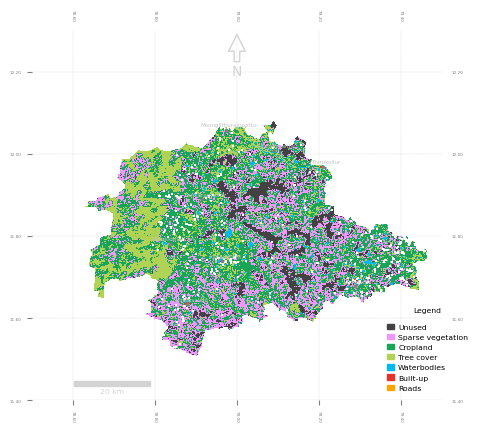

In [89]:

with rasterio.open(year_2021_new) as src:
    data = src.read(1)
# Create a color map for the categories
category_codes = {0: {'name': 'Unused', 'color': '#424242'},
                  1: {'name': 'Sparse-veg', 'color': '#f096ff'},
                  2: {'name': 'Cropland', 'color': '#18a558'},
                  3: {'name': 'Tree cover', 'color': '#B1D355'},
                  4: {'name': 'Water', 'color': '#00B9F2'},
                  5: {'name': 'Built-up', 'color': '#e73429'},
                  6: {'name': 'Roads', 'color': 'orange'}
                 }
cmap = mpl.colors.ListedColormap([v['color'] for k, v in category_codes.items()])

# Create a masked array to ignore nodata values
data_masked = np.ma.masked_where(data <= 0, data)

# Plot the raster data with colors based on the categories
fig, ax = plt.subplots()
plot_common_features(fig, ax)
plot_cities(fig, ax)
# im = ax.imshow(data_masked, cmap=cmap)
image = rasterio.plot.show(data_masked,transform=lc_2021.transform,
                      ax=ax,
                      cmap=cmap, 
                      )

Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="orange", label = 'Roads')

    
plt.legend(handles = [Unused, SpV, Crop, TC,Water,BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)



# Show the plot
plt.savefig(get_in_output("images/raster/LC_2021.jpg"),dpi =1500)
plt.show()

### Settlemet level visual

### Splitting the raster like unused, sparse veg, cropland....

In [11]:

# # Set up input file path
input_path =  year_2020_new
# Set up output file path
output_path = year_2020_new[:-8] + "_1.0.tif"

# Set the category value to extract
category_value = 1.0

# Open input file using GDAL
ds = gdal.Open(input_path)

# Get raster geotransform and projection
geotransform = ds.GetGeoTransform()
projection = ds.GetProjection()

# Read in raster data as array
data = ds.GetRasterBand(1).ReadAsArray()

# Create a new array with only the pixels with the desired category
new_data = np.where(data == category_value, data,0)

# Create a new raster dataset and write the new array to it
driver = gdal.GetDriverByName("GTiff")
new_ds = driver.Create(output_path, ds.RasterXSize, ds.RasterYSize, 1, gdal.GDT_Float32)
new_ds.SetGeoTransform(geotransform)
new_ds.SetProjection(projection)
new_ds.GetRasterBand(1).WriteArray(new_data)

# Close the datasets
ds = None
new_ds = None

### reading the files

In [11]:
lc_2020_1 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_1.0.tif"
lc_2021_1 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_1.0.tif"

In [17]:
lc_2020_2 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_2.0.tif"
lc_2021_2 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_2.0.tif"

In [18]:
lc_2020_3 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_3.0.tif"
lc_2021_3 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_3.0.tif"

In [19]:
lc_2020_4 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_4.0.tif"
lc_2021_4 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_4.0.tif"

In [20]:
lc_2020_5 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_5.0.tif"
lc_2021_5 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_5.0.tif"

In [21]:
lc_2020_6 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_6.0.tif"
lc_2021_6 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_6.0.tif"

In [22]:
lc_2020_7 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2020_4326_7.0.tif"
lc_2021_7 = "D:\\Lila_Kallakuruchi\\Raster\\modified_corrected\\lc_2021_4326_7.0.tif"

In [23]:
slope  = get_rooted("workdir/raster/slope.tif")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

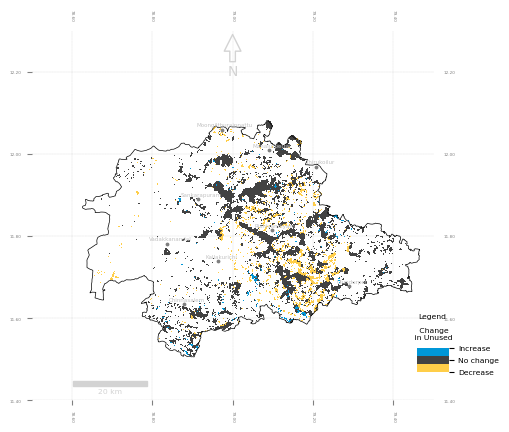

In [14]:
# Open the two raster files
with rasterio.open(lc_2020_1) as src1, rasterio.open(lc_2021_1) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#424242"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#424242","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.8, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Unused') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)
    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_1.0_new.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

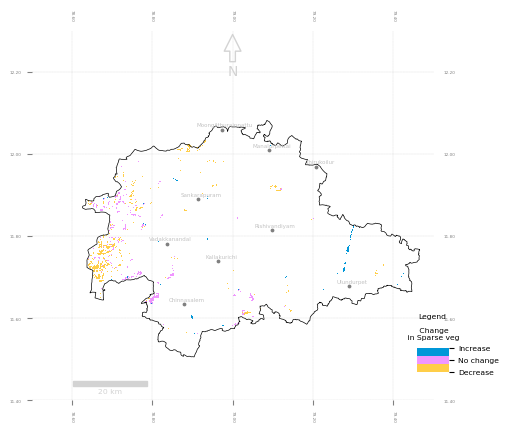

In [87]:
# Open the two raster files
with rasterio.open(lc_2020_2) as src1, rasterio.open(lc_2021_2) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)



    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#f096ff"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#f096ff","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)    
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.8, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Sparse veg') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)
    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_2.0.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

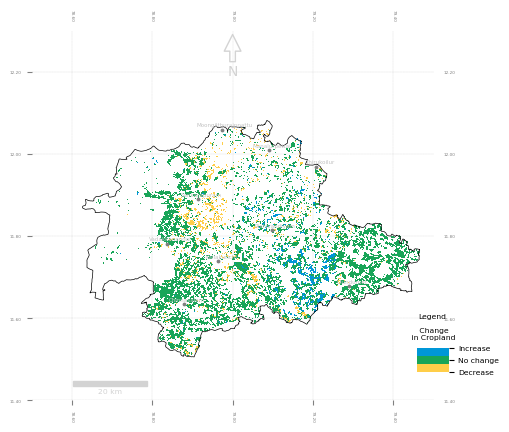

In [84]:

# Open the two raster files
with rasterio.open(lc_2020_3) as src1, rasterio.open(lc_2021_3) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#18a558"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#18a558","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.8, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Cropland') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)
    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_3.0.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

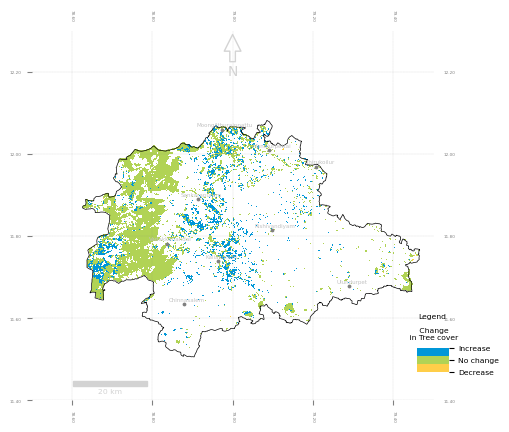

In [85]:

# Open the two raster files
with rasterio.open(lc_2020_4) as src1, rasterio.open(lc_2021_4) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#b1d355"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#b1d355","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.8, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Tree cover') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)
    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_4.0.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

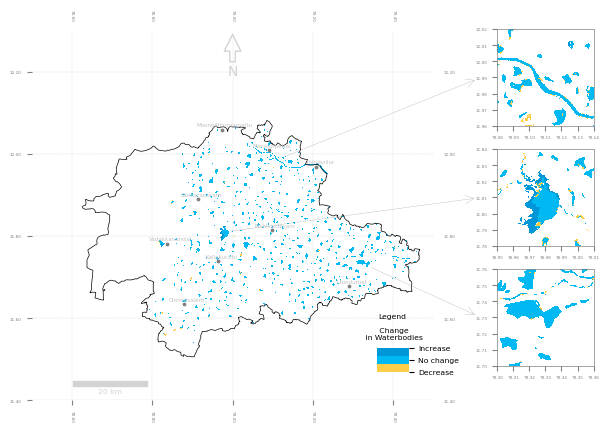

In [32]:

# Open the two raster files
with rasterio.open(lc_2020_5) as src1, rasterio.open(lc_2021_5) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#00b9f2"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#00b9f2","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    
    fig.subplots_adjust(left=0.05, right=0.8)
    
    
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.65, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Waterbodies') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)

    axins1 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.9 ), bbox_transform=ax.figure.transFigure)
    im = axins1.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins1.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins1.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins1, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins1.tick_params(axis='both', colors='grey', labelsize=3)
    axins1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins1.set_xlim(79.08, 79.14)
    axins1.set_ylim(11.96, 12.02)

    # Modify the edge color of the inset axes
    axins1.spines['top'].set_edgecolor('grey')
    axins1.spines['right'].set_edgecolor('grey')
    axins1.spines['bottom'].set_edgecolor('grey')
    axins1.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins1.spines['top'].set_linewidth(0.5)
    axins1.spines['right'].set_linewidth(0.5)
    axins1.spines['bottom'].set_linewidth(0.5)
    axins1.spines['left'].set_linewidth(0.5)

    zoom_patch = ConnectionPatch(xyA=(79.12, 11.99), coordsA=ax.transData,
                                 xyB=(79.07, 11.99), coordsB=axins1.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch.set_linestyle('dashed')
    zoom_patch.set_linewidth(0.2)
    ax.add_artist(zoom_patch)
    

    axins2 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.65 ), bbox_transform=ax.figure.transFigure)
    im = axins2.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins2.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins2.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins2, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins2.tick_params(axis='both', colors='grey', labelsize=3)
    axins2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins2.set_xlim(78.95, 79.01)
    axins2.set_ylim(11.78, 11.84)

    # Modify the edge color of the inset axes
    axins2.spines['top'].set_edgecolor('grey')
    axins2.spines['right'].set_edgecolor('grey')
    axins2.spines['bottom'].set_edgecolor('grey')
    axins2.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins2.spines['top'].set_linewidth(0.5)
    axins2.spines['right'].set_linewidth(0.5)
    axins2.spines['bottom'].set_linewidth(0.5)
    axins2.spines['left'].set_linewidth(0.5)

    zoom_patch2 = ConnectionPatch(xyA=(78.98, 11.81), coordsA=ax.transData,
                                 xyB=(78.94, 11.81), coordsB=axins2.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch2.set_linestyle('dashed')
    zoom_patch2.set_linewidth(0.2)
    ax.add_artist(zoom_patch2)
    
    axins3 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.4 ), bbox_transform=ax.figure.transFigure)
    im = axins3.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins3.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins3.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins3, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins3.tick_params(axis='both', colors='grey', labelsize=3)
    axins3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins3.set_xlim(79.30, 79.36)
    axins3.set_ylim(11.70, 11.76)

    # Modify the edge color of the inset axes
    axins3.spines['top'].set_edgecolor('grey')
    axins3.spines['right'].set_edgecolor('grey')
    axins3.spines['bottom'].set_edgecolor('grey')
    axins3.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins3.spines['top'].set_linewidth(0.5)
    axins3.spines['right'].set_linewidth(0.5)
    axins3.spines['bottom'].set_linewidth(0.5)
    axins3.spines['left'].set_linewidth(0.5)

    zoom_patch3 = ConnectionPatch(xyA=(79.33, 11.73), coordsA=ax.transData,
                                 xyB=(79.29, 11.73), coordsB=axins3.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch3.set_linestyle('dashed')
    zoom_patch3.set_linewidth(0.2)
    ax.add_artist(zoom_patch3)

    plt.savefig(get_in_output("images/raster/difference_5.0.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


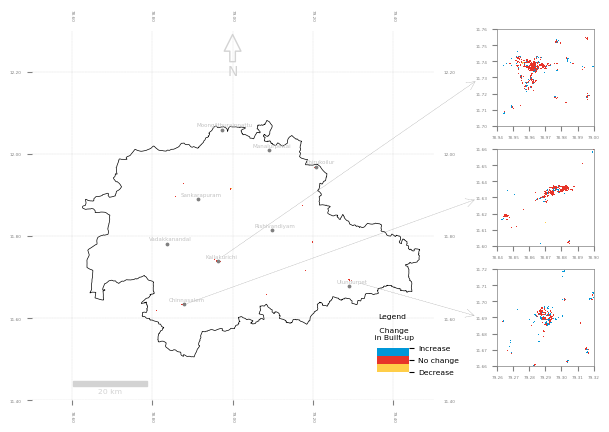

In [33]:
# Open the two raster files
with rasterio.open(lc_2020_6) as src1, rasterio.open(lc_2021_6) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#e73429"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#e73429","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    fig.subplots_adjust(left=0.05, right=0.8)
    
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.65, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Built-up') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)

    axins1 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.9), bbox_transform=ax.figure.transFigure)
    im = axins1.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins1.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins1.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins1, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins1.tick_params(axis='both', colors='grey', labelsize=3)
    axins1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins1.set_xlim(78.94, 79.00)
    axins1.set_ylim(11.70, 11.76)

    # Modify the edge color of the inset axes
    axins1.spines['top'].set_edgecolor('grey')
    axins1.spines['right'].set_edgecolor('grey')
    axins1.spines['bottom'].set_edgecolor('grey')
    axins1.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins1.spines['top'].set_linewidth(0.5)
    axins1.spines['right'].set_linewidth(0.5)
    axins1.spines['bottom'].set_linewidth(0.5)
    axins1.spines['left'].set_linewidth(0.5)

    zoom_patch = ConnectionPatch(xyA=(78.96, 11.74), coordsA=ax.transData,
                                 xyB=(78.93, 11.73), coordsB=axins1.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch.set_linestyle('dashed')
    zoom_patch.set_linewidth(0.2)
    ax.add_artist(zoom_patch)
    

    axins2 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.65), bbox_transform=ax.figure.transFigure)
    im = axins2.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins2.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins2.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins2, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins2.tick_params(axis='both', colors='grey', labelsize=3)
    axins2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins2.set_xlim(78.84, 78.90)
    axins2.set_ylim(11.60, 11.66)

    # Modify the edge color of the inset axes
    axins2.spines['top'].set_edgecolor('grey')
    axins2.spines['right'].set_edgecolor('grey')
    axins2.spines['bottom'].set_edgecolor('grey')
    axins2.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins2.spines['top'].set_linewidth(0.5)
    axins2.spines['right'].set_linewidth(0.5)
    axins2.spines['bottom'].set_linewidth(0.5)
    axins2.spines['left'].set_linewidth(0.5)

    zoom_patch2 = ConnectionPatch(xyA=(78.87, 11.63), coordsA=ax.transData,
                                 xyB=(78.83, 11.63), coordsB=axins2.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch2.set_linestyle('dashed')
    zoom_patch2.set_linewidth(0.2)
    ax.add_artist(zoom_patch2)
    
    axins3 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.4), bbox_transform=ax.figure.transFigure)
    im = axins3.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = axins3.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    axins3.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=axins3, 
                          cmap=cmap, 
                          )
    # adjust tick parameters and limits of zoomed inset axes
    axins3.tick_params(axis='both', colors='grey', labelsize=3)
    axins3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axins3.set_xlim(79.26, 79.32)
    axins3.set_ylim(11.66, 11.72)

    # Modify the edge color of the inset axes
    axins3.spines['top'].set_edgecolor('grey')
    axins3.spines['right'].set_edgecolor('grey')
    axins3.spines['bottom'].set_edgecolor('grey')
    axins3.spines['left'].set_edgecolor('grey')
    # Modify the line thickness of the inset axes spines
    axins3.spines['top'].set_linewidth(0.5)
    axins3.spines['right'].set_linewidth(0.5)
    axins3.spines['bottom'].set_linewidth(0.5)
    axins3.spines['left'].set_linewidth(0.5)

    zoom_patch3 = ConnectionPatch(xyA=(79.30, 11.69), coordsA=ax.transData,
                                 xyB=(79.25, 11.69), coordsB=axins3.transData,
                                 arrowstyle="->", shrinkA=5, shrinkB=5,
                                 mutation_scale=15, fc="none", ec="grey")
    zoom_patch3.set_linestyle('dashed')
    zoom_patch3.set_linewidth(0.2)
    ax.add_artist(zoom_patch3)


    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_6.0.jpg"),dpi =1500)
    plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

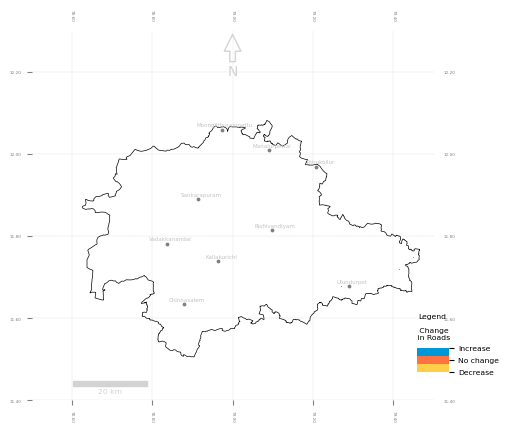

In [79]:
# Open the two raster files
with rasterio.open(lc_2020_7) as src1, rasterio.open(lc_2021_7) as src2:
    # Read the raster data as arrays
    raster1 = src1.read(1)
    raster2 = src2.read(1)

    # Calculate the difference between the two rasters
    diff = raster2 - raster1

    # Mask the difference array with the category mask
    masked_diff = np.ma.masked_array(diff, 0)
    
   
    
    # Create a custom color map that shows positive changes in green and negative changes in red
    colors = ["#ffce49","none","#0097d8"]
    cmap = ListedColormap(colors)
    vmin, vmax = -1, 1
    color1 =["none","#ff7242"]
    cmap1 = ListedColormap(color1)
    color_l = ["#ffce49","#ff7242","#0097d8"]
    cmap_l = ListedColormap(color_l)

    # Set up the figure and plot the masked difference array
    fig, ax = plt.subplots()
    plot_common_features(fig, ax)
    plot_cities(fig, ax)
    im = ax.imshow(diff, cmap=cmap, interpolation='none' , vmin=vmin, vmax=vmax)
    im_l = ax.imshow(diff, cmap=cmap_l, visible =False,vmin=vmin, vmax=vmax)
    ax.imshow(raster2, cmap =cmap1, zorder=0, extent=rasterio.plot.plotting_extent(src1))
    cbaxes = fig.add_axes([0.8, 0.17, 0.05, 0.05], frameon=False, title = 'Legend\n \n Change\n in Roads') 
    cbar = fig.colorbar(im_l, cax=cbaxes,cmap =cmap_l,ticks=[-1, 0, 1])
    cbar.ax.tick_params(labelsize=5.5)
    cbar.ax.set_yticklabels(['Decrease', 'No change', 'Increase'])
    cbaxes.title.set_size(5.5)
    image = rasterio.plot.show(diff, 
                          transform=src1.transform, 
                          ax=ax, 
                          cmap=cmap, 
                          )
    shp_district.plot(ax=ax, facecolor="none", edgecolor="black",linewidth=0.5)

    # Show the plot
    plt.savefig(get_in_output("images/raster/difference_7.0.jpg"),dpi =1500)
    plt.show()

In [48]:
result["Unused_diff"] = result["LC_1.0_2021"] - result["LC_1.0_2020"]
result["Sparseveg_diff"] = result["LC_2.0_2021"] - result["LC_2.0_2020"]
result["CropLand_diff"] = result["LC_3.0_2021"] - result["LC_3.0_2020"]
result["Treecover_diff"] = result["LC_4.0_2021"] - result["LC_4.0_2020"]
result["Water_diff"] = result["LC_5.0_2021"] - result["LC_5.0_2020"]
result["Builtup_diff"] = result["LC_6.0_2021"] - result["LC_6.0_2020"]
result["Roads_diff"] = result["LC_7.0_2021"] - result["LC_7.0_2020"]

In [49]:
result = result.to_crs(4326)

In [50]:
result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gid             460 non-null    int64   
 1   dist_name_      460 non-null    object  
 2   ed_distric      460 non-null    object  
 3   drd_dcode       0 non-null      object  
 4   drddcode_1      460 non-null    float64 
 5   dist_mmm_1      0 non-null      object  
 6   cen_dcode2      0 non-null      object  
 7   cen_dcod_1      0 non-null      object  
 8   cen_dcode       0 non-null      object  
 9   dcode           460 non-null    int64   
 10  district        460 non-null    object  
 11  district_t      460 non-null    object  
 12  ogc_fid         460 non-null    int64   
 13  fid_1           460 non-null    int64   
 14  p_name          460 non-null    object  
 15  d_name          460 non-null    object  
 16  b_name          460 non-null    object  
 17  p_name_r

In [51]:
result["LC_max_value"] = result.iloc[:, 68:75].max(axis=1)

In [52]:
# Find the index of the column with the maximum value in the first seven columns
max_col_index = result.iloc[:, 68:75].idxmax(axis=1)

# Create a new column and fill it with a particular name based on the max column index
result['LC_max'] = 'unknown'
result['LC_max'][max_col_index == 'Unused_diff'] = '#424242'
result['LC_max'][max_col_index == 'Sparseveg_diff'] = '#f096ff'
result['LC_max'][max_col_index == 'CropLand_diff'] = '#18a558'
result['LC_max'][max_col_index == 'Treecover_diff'] = '#B1D355'
result['LC_max'][max_col_index == 'Water_diff'] = '#00B9F2'
result['LC_max'][max_col_index == 'Builtup_diff'] = '#e73429'
result['LC_max'][max_col_index == 'Roads_diff'] = '#ff7242'

C:\Users\User\AppData\Local\Temp\ipykernel_9592\3076055203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['LC_max'][max_col_index == 'Unused_diff'] = '#424242'
C:\Users\User\AppData\Local\Temp\ipykernel_9592\3076055203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['LC_max'][max_col_index == 'Sparseveg_diff'] = '#f096ff'
C:\Users\User\AppData\Local\Temp\ipykernel_9592\3076055203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

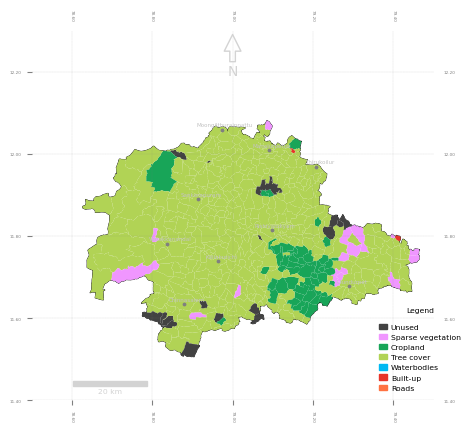

In [78]:
fig7, ax7 = plt.subplots()

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)
result.plot(color =result["LC_max"],ax =ax7)
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="#ff7242", label = 'Roads')
    
plt.legend(handles = [Unused, SpV, Crop, TC,  Water,BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/lc_max.jpg"),dpi =1500)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

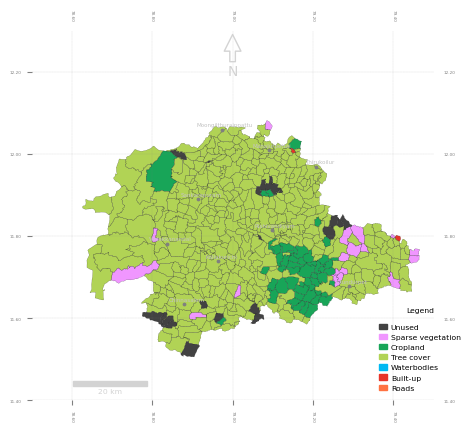

In [77]:
fig7, ax7 = plt.subplots()

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


shp_settlement.boundary.plot(ax=ax7, figsize =(5,5),color="black",linewidth = 0.1)
result.plot(color =result["LC_max"],ax =ax7)
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="#ff7242", label = 'Roads')
    
plt.legend(handles = [Unused, SpV, Crop, TC,  Water,BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/lc_max_wb.jpg"),dpi =1500)
plt.show()

In [54]:
result["LC_max_per"] = (result["LC_max_value"]/result["area_acres"])*100

In [55]:
result["LC_min_value"] = result.iloc[:, 68:76].min(axis=1)

In [56]:
# Find the index of the column with the maximum value in the first seven columns
min_col_index = result.iloc[:, 68:76].idxmin(axis=1)

# Create a new column and fill it with a particular name based on the max column index
result['LC_min'] = 'unknown'
result['LC_min'][min_col_index == 'Unused_diff'] = '#424242'
result['LC_min'][min_col_index == 'Sparseveg_diff'] = '#f096ff'
result['LC_min'][min_col_index == 'CropLand_diff'] = '#18a558'
result['LC_min'][min_col_index == 'Treecover_diff'] = '#B1D355'
result['LC_min'][min_col_index == 'Water_diff'] = '#00B9F2'
result['LC_min'][min_col_index == 'Builtup_diff'] = '#e73429'
result['LC_min'][min_col_index == 'Roads_diff'] = '#ff7242'

C:\Users\User\AppData\Local\Temp\ipykernel_9592\2160904606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['LC_min'][min_col_index == 'Unused_diff'] = '#424242'
C:\Users\User\AppData\Local\Temp\ipykernel_9592\2160904606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['LC_min'][min_col_index == 'Sparseveg_diff'] = '#f096ff'
C:\Users\User\AppData\Local\Temp\ipykernel_9592\2160904606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

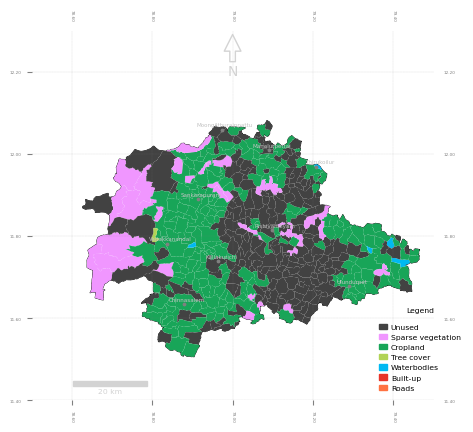

In [76]:
fig7, ax7 = plt.subplots()

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)

shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)
result.plot(color =result["LC_min"],ax =ax7)
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="#ff7242", label = 'Roads')
    
plt.legend(handles = [Unused, SpV, Crop, TC, Water, BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/LC_min.jpg"),dpi =1500)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

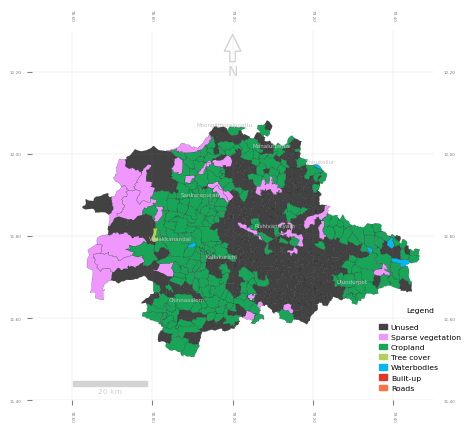

In [71]:
fig7, ax7 = plt.subplots()

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


shp_settlement.boundary.plot(ax=ax7, figsize =(5,5),color="black",linewidth = 0.1)
result.plot(color =result["LC_min"],ax =ax7)
Unused = mpatches.Patch(color="#424242", label ='Unused')
SpV = mpatches.Patch(color="#f096ff", label = 'Sparse vegetation')
Crop = mpatches.Patch(color="#18a558", label = 'Cropland')
TC = mpatches.Patch(color="#B1D355", label = 'Tree cover')
BU = mpatches.Patch(color="#e73429", label = 'Built-up')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
Roads = mpatches.Patch(color="#ff7242", label = 'Roads')
    
plt.legend(handles = [Unused, SpV, Crop, TC, Water, BU,Roads], loc = 'upper left', bbox_to_anchor=(0.85, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/LC_min_wb.jpg"),dpi =1500)
plt.show()

In [58]:
result["LC_min_per"] = (result["LC_min_value"]/result["area_acres"])*100

In [59]:
result["LC_abs_sum"] = result.iloc[:, 68:75].abs().sum(axis=1)
S1 = LinearSegmentedColormap.from_list('testCmap1', colors=["#ffeb87", "#ffb639", "#df8439", "#a95829", "#823a28"], N=256)

In [60]:
result

,gid,dist_name_,ed_distric,drd_dcode,drddcode_1,dist_mmm_1,cen_dcode2,cen_dcod_1,cen_dcode,dcode,...,Water_diff,Builtup_diff,Roads_diff,LC_max_value,LC_max,LC_max_per,LC_min_value,LC_min,LC_min_per,LC_abs_sum
0,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,0.000000,0.000000,0.0,5.436551,#B1D355,3.938441,-4.744626,#18a558,-3.437184,11.268488
1,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-0.395386,0.000000,0.0,27.578141,#B1D355,8.535204,-19.769276,#424242,-6.118426,72.355552
2,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,0.000000,0.000000,0.0,130.773764,#B1D355,19.936392,-84.315964,#f096ff,-12.853925,261.547527
3,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-10.181177,0.000000,0.0,269.850623,#B1D355,14.384812,-238.318627,#424242,-12.703949,539.701247
4,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-11.861566,1.779235,0.0,51.301272,#B1D355,24.757486,-37.462779,#18a558,-18.079166,106.062168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-3.360777,3.657316,0.0,98.450997,#B1D355,8.154457,-103.195623,#18a558,-8.547442,249.290576
456,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-2.668852,0.296539,0.0,6.029629,#f096ff,2.752542,-8.401942,#18a558,-3.835510,24.415056
457,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-16.408499,2.075774,0.0,80.658648,#424242,6.074769,-169.323853,#18a558,-12.752549,371.563551
458,22,Kallakurichi,33,None,4.0,None,None,None,None,4,...,-13.541954,10.378870,0.0,151.333811,#B1D355,5.496538,-116.836424,#18a558,-4.243571,377.889719


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

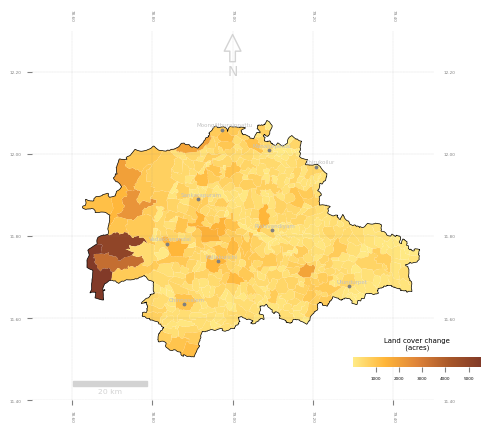

In [88]:
fig, ax = plt.subplots()

plot_common_features(fig, ax)  # assuming this function is defined elsewhere
plot_cities(fig, ax)
shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
result.plot(column='LC_abs_sum', cmap=S1, ax=ax)
a = result["LC_abs_sum"].min()
b = result["LC_abs_sum"].max()
sm = plt.cm.ScalarMappable(cmap=S1)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Land cover change\n (acres)', fontsize=5)
plt.savefig(get_in_output("images/lc_abs.jpg"),dpi =1500)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

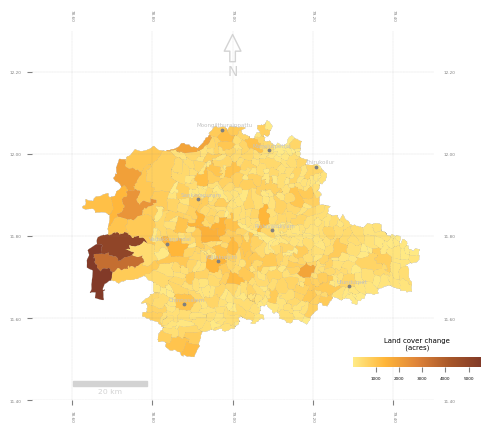

In [75]:
fig, ax = plt.subplots()

plot_common_features(fig, ax)  # assuming this function is defined elsewhere
plot_cities(fig, ax)
shp_settlement.boundary.plot(figsize=(5,5), color="black", ax=ax, linewidth=0.1, zorder=1)
result.plot(column='LC_abs_sum', cmap=S1, ax=ax)
a = result["LC_abs_sum"].min()
b = result["LC_abs_sum"].max()
sm = plt.cm.ScalarMappable(cmap=S1)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Land cover change\n (acres)', fontsize=5)
plt.savefig(get_in_output("images/lc_abs_wb.jpg"),dpi =1500)
plt.show()

In [130]:
result = result.to_crs(32644)
result["TGA(acres)"] = ((result.geometry.area)/10**6)*247.105
result = result.to_crs(4326)

In [131]:
Lc_results= result[['p_name', 'd_name',
       'b_name', 'p_name_rd', 'pancha_id', 'block_id_o', 'dist_id','LC_1.0_2019',
       'LC_2.0_2019', 'LC_3.0_2019', 'LC_4.0_2019', 'LC_5.0_2019',
       'LC_6.0_2019', 'LC_7.0_2019', 'LC_1.0_2020', 'LC_2.0_2020',
       'LC_3.0_2020', 'LC_4.0_2020', 'LC_5.0_2020', 'LC_6.0_2020',
       'LC_7.0_2020', 'LC_1.0_2021', 'LC_2.0_2021', 'LC_3.0_2021',
       'LC_4.0_2021', 'LC_5.0_2021', 'LC_6.0_2021', 'LC_7.0_2021',
       'Unused_diff', 'Sparseveg_diff', 'CropLand_diff', 'Treecover_diff',
       'Water_diff', 'Builtup_diff', 'Roads_diff', 'LC_max_value', 'LC_max','LC_max_per', 'LC_min_value', 'LC_min', 'LC_min_per',
       'LC_abs_sum','area_acres', 'TGA(acres)', 'geometry']]

In [132]:
Lc_results.drop("geometry",axis =1 , inplace =True)

C:\Users\User\AppData\Local\Temp\ipykernel_1380\2542372607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lc_results.drop("geometry",axis =1 , inplace =True)


In [133]:
# Lc_results.to_excel(get_in_output("raster/Lc_results.xlsx"))

### land cover (conversion analysis)

In [13]:
import time

In [14]:
start_time = time.time()

In [15]:
unused_20 = read_df_UT("land_cover_20/unused/unused.shp")
sparseveg_20 = read_df_UT("land_cover_20/sparseveg/sparseveg.shp")
cropland_20 = read_df_UT("land_cover_20/cropland/cropland.shp")
treecover_20 = read_df_UT("land_cover_20/treecover/treecover.shp")
water_20 = read_df_UT("land_cover_20/waterbodies/waterbodies.shp")
builtup_20 = read_df_UT("land_cover_20/builtup/builtup.shp")
roads_20 = read_df_UT("land_cover_20/roads/roads.shp")

In [16]:
unused_20 = unused_20[unused_20["DN"]==1]
unused_20.reset_index(drop =True,inplace =True)
sparseveg_20 = sparseveg_20[sparseveg_20["DN"]==2]
sparseveg_20.reset_index(drop =True,inplace =True)
cropland_20 = cropland_20[cropland_20["DN"]==3]
cropland_20.reset_index(drop =True,inplace =True)
treecover_20 = treecover_20[treecover_20["DN"]==4]
treecover_20.reset_index(drop =True,inplace =True)
water_20 = water_20[water_20["DN"]==5]
water_20.reset_index(drop =True,inplace =True)
builtup_20 = builtup_20[builtup_20["DN"]==6]
builtup_20.reset_index(drop =True,inplace =True)
roads_20 = roads_20[roads_20["DN"]==7]
roads_20.reset_index(drop =True,inplace =True)

In [17]:
unused_21 = read_df_UT("land_cover_21/unused/unused.shp")
sparseveg_21 = read_df_UT("land_cover_21/sparseveg/sparseveg.shp")
cropland_21 = read_df_UT("land_cover_21/cropland/cropland.shp")
treecover_21 = read_df_UT("land_cover_21/treecover/treecover.shp")
water_21 = read_df_UT("land_cover_21/waterbodies/waterbodies.shp")
builtup_21 = read_df_UT("land_cover_21/builtup/builtup.shp")

In [18]:
roads_21 = read_df_UT("land_cover_21/roads/roads.shp")

In [19]:
unused_21 = unused_21[unused_21["DN"]==1]
unused_21.reset_index(drop =True,inplace =True)
sparseveg_21 = sparseveg_21[sparseveg_21["DN"]==2]
sparseveg_21.reset_index(drop =True,inplace =True)
cropland_21 = cropland_21[cropland_21["DN"]==3]
cropland_21.reset_index(drop =True,inplace =True)
treecover_21 = treecover_21[treecover_21["DN"]==4]
treecover_21.reset_index(drop =True,inplace =True)
water_21 = water_21[water_21["DN"]==5]
water_21.reset_index(drop =True,inplace =True)
builtup_21 = builtup_21[builtup_21["DN"]==6]
builtup_21.reset_index(drop =True,inplace =True)
roads_21 = roads_21[roads_21["DN"]==7]
roads_21.reset_index(drop =True,inplace =True)

In [20]:
un20_un21 = gpd.overlay(unused_20,unused_21,how="intersection",keep_geom_type =True)
un20_sv21 = gpd.overlay(unused_20,sparseveg_21,how="intersection",keep_geom_type =True)
un20_cl21 = gpd.overlay(unused_20,cropland_21,how="intersection",keep_geom_type =True)
un20_tc21 = gpd.overlay(unused_20,treecover_21,how="intersection",keep_geom_type =True)
un20_wb21 = gpd.overlay(unused_20,water_21,how="intersection",keep_geom_type =True)
un20_bu21 = gpd.overlay(unused_20,builtup_21,how="intersection",keep_geom_type =True)

In [21]:
un20_rd21 = gpd.overlay(unused_20,roads_21,how="intersection",keep_geom_type =True)

In [22]:
# unused_20 = add_area_and_class(unused_20)

In [23]:
# unused_21 = add_area_and_class(unused_21)

In [24]:
un20_un21 = add_area_and_class(un20_un21)
un20_sv21 = add_area_and_class(un20_sv21)
un20_cl21 = add_area_and_class(un20_cl21)
un20_tc21 = add_area_and_class(un20_tc21)
un20_wb21 = add_area_and_class(un20_wb21)
un20_bu21 = add_area_and_class(un20_bu21)
un20_rd21 = add_area_and_class(un20_rd21)

In [25]:
un20_un21 = un20_un21[["area_acres","geometry"]]
un20_sv21 = un20_sv21[["area_acres","geometry"]]
un20_cl21 = un20_cl21[["area_acres","geometry"]]
un20_tc21 = un20_tc21[["area_acres","geometry"]]
un20_wb21 = un20_wb21[["area_acres","geometry"]]
un20_bu21 = un20_bu21[["area_acres","geometry"]]
un20_rd21 = un20_rd21[["area_acres","geometry"]]

In [26]:
data = {
    'un20_un21': un20_un21.area_acres.sum(),
    'un20_sv21': un20_sv21.area_acres.sum(),
    'un20_cl21':un20_cl21.area_acres.sum(),
    'un20_tc21': un20_tc21.area_acres.sum(),
    'un20_wb21': un20_wb21.area_acres.sum(),
    'un20_bu21':un20_bu21.area_acres.sum(),
    'un20_rd21':un20_rd21.area_acres.sum()
}
competing_use = pd.DataFrame(data, index=[0])

In [27]:
competing_use

,un20_un21,un20_sv21,un20_cl21,un20_tc21,un20_wb21,un20_bu21,un20_rd21
0,155322.281877,14248.267022,52280.086278,20861.64588,809.288047,2056.730907,303.333946


In [28]:
sv20_un21 = gpd.overlay(sparseveg_20,unused_21,how="intersection",keep_geom_type =True)
sv20_sv21 = gpd.overlay(sparseveg_20,sparseveg_21,how="intersection",keep_geom_type =True)
sv20_cl21 = gpd.overlay(sparseveg_20,cropland_21,how="intersection",keep_geom_type =True)
sv20_tc21 = gpd.overlay(sparseveg_20,treecover_21,how="intersection",keep_geom_type =True)
sv20_wb21 = gpd.overlay(sparseveg_20,water_21,how="intersection",keep_geom_type =True)
sv20_bu21 = gpd.overlay(sparseveg_20,builtup_21,how="intersection",keep_geom_type =True)
sv20_rd21 = gpd.overlay(sparseveg_20,roads_21,how="intersection",keep_geom_type =True)

In [29]:
sv20_un21 = add_area_and_class(sv20_un21)
sv20_sv21 = add_area_and_class(sv20_sv21)
sv20_cl21 = add_area_and_class(sv20_cl21)
sv20_tc21 = add_area_and_class(sv20_tc21)
sv20_wb21 = add_area_and_class(sv20_wb21)
sv20_bu21 = add_area_and_class(sv20_bu21)
sv20_rd21 = add_area_and_class(sv20_rd21)

In [30]:
sv20_un21 = sv20_un21[["area_acres","geometry"]]
sv20_sv21 = sv20_sv21[["area_acres","geometry"]]
sv20_cl21 = sv20_cl21[["area_acres","geometry"]]
sv20_tc21 = sv20_tc21[["area_acres","geometry"]]
sv20_wb21 = sv20_wb21[["area_acres","geometry"]]
sv20_bu21 = sv20_bu21[["area_acres","geometry"]]
sv20_rd21 = sv20_rd21[["area_acres","geometry"]]

In [31]:
data = {
    'sv20_un21': sv20_un21.area_acres.sum(),
    'sv20_sv21': sv20_sv21.area_acres.sum(),
    'sv20_cl21':sv20_cl21.area_acres.sum(),
    'sv20_tc21': sv20_tc21.area_acres.sum(),
    'sv20_wb21': sv20_wb21.area_acres.sum(),
    'sv20_bu21':sv20_bu21.area_acres.sum(),
    'sv20_rd21':sv20_rd21.area_acres.sum(),
}
competing_use_sv = pd.DataFrame(data, index=[0])

In [32]:
competing_use_sv

,sv20_un21,sv20_sv21,sv20_cl21,sv20_tc21,sv20_wb21,sv20_bu21,sv20_rd21
0,5592.647615,19557.716166,5301.249846,22978.4926,57.542392,46.905505,45.516918


In [33]:
cl20_un21 = gpd.overlay(cropland_20,unused_21,how="intersection",keep_geom_type =True)
cl20_sv21 = gpd.overlay(cropland_20,sparseveg_21,how="intersection",keep_geom_type =True)
cl20_cl21 = gpd.overlay(cropland_20,cropland_21,how="intersection",keep_geom_type =True)
cl20_tc21 = gpd.overlay(cropland_20,treecover_21,how="intersection",keep_geom_type =True)
cl20_wb21 = gpd.overlay(cropland_20,water_21,how="intersection",keep_geom_type =True)
cl20_bu21 = gpd.overlay(cropland_20,builtup_21,how="intersection",keep_geom_type =True)
cl20_rd21 = gpd.overlay(cropland_20,roads_21,how="intersection",keep_geom_type =True)

cl20_un21 = add_area_and_class(cl20_un21)
cl20_sv21 = add_area_and_class(cl20_sv21)
cl20_cl21 = add_area_and_class(cl20_cl21)
cl20_tc21 = add_area_and_class(cl20_tc21)
cl20_wb21 = add_area_and_class(cl20_wb21)
cl20_bu21 = add_area_and_class(cl20_bu21)
cl20_rd21 = add_area_and_class(cl20_rd21)

cl20_un21 = cl20_un21[["area_acres","geometry"]]
cl20_sv21 = cl20_sv21[["area_acres","geometry"]]
cl20_cl21 = cl20_cl21[["area_acres","geometry"]]
cl20_tc21 = cl20_tc21[["area_acres","geometry"]]
cl20_wb21 = cl20_wb21[["area_acres","geometry"]]
cl20_bu21 = cl20_bu21[["area_acres","geometry"]]
cl20_rd21 = cl20_rd21[["area_acres","geometry"]]

data = {
    'cl20_un21': cl20_un21.area_acres.sum(),
    'cl20_sv21': cl20_sv21.area_acres.sum(),
    'cl20_cl21':cl20_cl21.area_acres.sum(),
    'cl20_tc21': cl20_tc21.area_acres.sum(),
    'cl20_wb21': cl20_wb21.area_acres.sum(),
    'cl20_bu21':cl20_bu21.area_acres.sum(),
    'cl20_rd21':cl20_rd21.area_acres.sum(),
}
competing_use_cl = pd.DataFrame(data, index=[0])

In [34]:
competing_use_cl

,cl20_un21,cl20_sv21,cl20_cl21,cl20_tc21,cl20_wb21,cl20_bu21,cl20_rd21
0,37974.775216,12295.117027,170637.389014,44230.221845,224.236538,11.329885,122.333587


In [35]:
tc20_un21 = gpd.overlay(treecover_20,unused_21,how="intersection",keep_geom_type =True)
tc20_sv21 = gpd.overlay(treecover_20,sparseveg_21,how="intersection",keep_geom_type =True)
tc20_cl21 = gpd.overlay(treecover_20,cropland_21,how="intersection",keep_geom_type =True)
tc20_tc21 = gpd.overlay(treecover_20,treecover_21,how="intersection",keep_geom_type =True)
tc20_wb21 = gpd.overlay(treecover_20,water_21,how="intersection",keep_geom_type =True)
tc20_bu21 = gpd.overlay(treecover_20,builtup_21,how="intersection",keep_geom_type =True)
tc20_rd21 = gpd.overlay(treecover_20,roads_21,how="intersection",keep_geom_type =True)

tc20_un21 = add_area_and_class(tc20_un21)
tc20_sv21 = add_area_and_class(tc20_sv21)
tc20_cl21 = add_area_and_class(tc20_cl21)
tc20_tc21 = add_area_and_class(tc20_tc21)
tc20_wb21 = add_area_and_class(tc20_wb21)
tc20_bu21 = add_area_and_class(tc20_bu21)
tc20_rd21 = add_area_and_class(tc20_rd21)

tc20_un21 = tc20_un21[["area_acres","geometry"]]
tc20_sv21 = tc20_sv21[["area_acres","geometry"]]
tc20_cl21 = tc20_cl21[["area_acres","geometry"]]
tc20_tc21 = tc20_tc21[["area_acres","geometry"]]
tc20_wb21 = tc20_wb21[["area_acres","geometry"]]
tc20_bu21 = tc20_bu21[["area_acres","geometry"]]
tc20_rd21 = tc20_rd21[["area_acres","geometry"]]

data = {
    'tc20_un21': tc20_un21.area_acres.sum(),
    'tc20_sv21': tc20_sv21.area_acres.sum(),
    'tc20_cl21':tc20_cl21.area_acres.sum(),
    'tc20_tc21': tc20_tc21.area_acres.sum(),
    'tc20_wb21': tc20_wb21.area_acres.sum(),
    'tc20_bu21':tc20_bu21.area_acres.sum(),
    'tc20_rd21':tc20_rd21.area_acres.sum(),
}
competing_use_tc = pd.DataFrame(data, index=[0])

In [36]:
competing_use_tc

,tc20_un21,tc20_sv21,tc20_cl21,tc20_tc21,tc20_wb21,tc20_bu21,tc20_rd21
0,3474.600081,4455.390789,7801.982702,149389.385716,553.035148,93.70371,133.362114


In [37]:
wb20_un21 = gpd.overlay(water_20,unused_21,how="intersection",keep_geom_type =True)
wb20_sv21 = gpd.overlay(water_20,sparseveg_21,how="intersection",keep_geom_type =True)
wb20_cl21 = gpd.overlay(water_20,cropland_21,how="intersection",keep_geom_type =True)
wb20_tc21 = gpd.overlay(water_20,treecover_21,how="intersection",keep_geom_type =True)
wb20_wb21 = gpd.overlay(water_20,water_21,how="intersection",keep_geom_type =True)
wb20_bu21 = gpd.overlay(water_20,builtup_21,how="intersection",keep_geom_type =True)
wb20_rd21 = gpd.overlay(water_20,roads_21,how="intersection",keep_geom_type =True)

wb20_un21 = add_area_and_class(wb20_un21)
wb20_sv21 = add_area_and_class(wb20_sv21)
wb20_cl21 = add_area_and_class(wb20_cl21)
wb20_tc21 = add_area_and_class(wb20_tc21)
wb20_wb21 = add_area_and_class(wb20_wb21)
wb20_bu21 = add_area_and_class(wb20_bu21)
wb20_rd21 = add_area_and_class(wb20_rd21)

wb20_un21 = wb20_un21[["area_acres","geometry"]]
wb20_sv21 = wb20_sv21[["area_acres","geometry"]]
wb20_cl21 = wb20_cl21[["area_acres","geometry"]]
wb20_tc21 = wb20_tc21[["area_acres","geometry"]]
wb20_wb21 = wb20_wb21[["area_acres","geometry"]]
wb20_bu21 = wb20_bu21[["area_acres","geometry"]]
wb20_rd21 = wb20_rd21[["area_acres","geometry"]]

data = {
    'wb20_un21': wb20_un21.area_acres.sum(),
    'wb20_sv21': wb20_sv21.area_acres.sum(),
    'wb20_cl21':wb20_cl21.area_acres.sum(),
    'wb20_tc21': wb20_tc21.area_acres.sum(),
    'wb20_wb21': wb20_wb21.area_acres.sum(),
    'wb20_bu21':wb20_bu21.area_acres.sum(),
    'wb20_rd21':wb20_rd21.area_acres.sum(),
}
competing_use_wb = pd.DataFrame(data, index=[0])

In [38]:
competing_use_wb

,wb20_un21,wb20_sv21,wb20_cl21,wb20_tc21,wb20_wb21,wb20_bu21,wb20_rd21
0,116.483789,50.492105,149.797551,6088.082102,45819.035842,0.397616,1.689647


In [39]:
bu20_un21 = gpd.overlay(builtup_20,unused_21,how="intersection",keep_geom_type =True)
bu20_sv21 = gpd.overlay(builtup_20,sparseveg_21,how="intersection",keep_geom_type =True)
bu20_cl21 = gpd.overlay(builtup_20,cropland_21,how="intersection",keep_geom_type =True)
bu20_tc21 = gpd.overlay(builtup_20,treecover_21,how="intersection",keep_geom_type =True)
bu20_wb21 = gpd.overlay(builtup_20,water_21,how="intersection",keep_geom_type =True)
bu20_bu21 = gpd.overlay(builtup_20,builtup_21,how="intersection",keep_geom_type =True)
bu20_rd21 = gpd.overlay(builtup_20,roads_21,how="intersection",keep_geom_type =True)

bu20_un21 = add_area_and_class(bu20_un21)
bu20_sv21 = add_area_and_class(bu20_sv21)
bu20_cl21 = add_area_and_class(bu20_cl21)
bu20_tc21 = add_area_and_class(bu20_tc21)
bu20_wb21 = add_area_and_class(bu20_wb21)
bu20_bu21 = add_area_and_class(bu20_bu21)
bu20_rd21 = add_area_and_class(bu20_rd21)

bu20_un21 = bu20_un21[["area_acres","geometry"]]
bu20_sv21 = bu20_sv21[["area_acres","geometry"]]
bu20_cl21 = bu20_cl21[["area_acres","geometry"]]
bu20_tc21 = bu20_tc21[["area_acres","geometry"]]
bu20_wb21 = bu20_wb21[["area_acres","geometry"]]
bu20_bu21 = bu20_bu21[["area_acres","geometry"]]
bu20_rd21 = bu20_rd21[["area_acres","geometry"]]

data = {
    'bu20_un21': bu20_un21.area_acres.sum(),
    'bu20_sv21': bu20_sv21.area_acres.sum(),
    'bu20_cl21':bu20_cl21.area_acres.sum(),
    'bu20_tc21': bu20_tc21.area_acres.sum(),
    'bu20_wb21': bu20_wb21.area_acres.sum(),
    'bu20_bu21':bu20_bu21.area_acres.sum(),
    'bu20_rd21':bu20_rd21.area_acres.sum(),
}
competing_use_bu = pd.DataFrame(data, index=[0])

In [40]:
competing_use_bu

,bu20_un21,bu20_sv21,bu20_cl21,bu20_tc21,bu20_wb21,bu20_bu21,bu20_rd21
0,162.581371,4.074134,0.497164,5.764199,0.099356,3132.673955,15.506381


In [41]:
rd20_un21 = gpd.overlay(roads_20,unused_21,how="intersection",keep_geom_type =True)
rd20_sv21 = gpd.overlay(roads_20,sparseveg_21,how="intersection",keep_geom_type =True)
rd20_cl21 = gpd.overlay(roads_20,cropland_21,how="intersection",keep_geom_type =True)
rd20_tc21 = gpd.overlay(roads_20,treecover_21,how="intersection",keep_geom_type =True)
rd20_wb21 = gpd.overlay(roads_20,water_21,how="intersection",keep_geom_type =True)
rd20_bu21 = gpd.overlay(roads_20,builtup_21,how="intersection",keep_geom_type =True)
rd20_rd21 = gpd.overlay(roads_20,roads_21,how="intersection",keep_geom_type =True)

rd20_un21 = add_area_and_class(rd20_un21)
rd20_sv21 = add_area_and_class(rd20_sv21)
rd20_cl21 = add_area_and_class(rd20_cl21)
rd20_tc21 = add_area_and_class(rd20_tc21)
rd20_wb21 = add_area_and_class(rd20_wb21)
rd20_bu21 = add_area_and_class(rd20_bu21)
rd20_rd21 = add_area_and_class(rd20_rd21)

rd20_un21 = rd20_un21[["area_acres","geometry"]]
rd20_sv21 = rd20_sv21[["area_acres","geometry"]]
rd20_cl21 = rd20_cl21[["area_acres","geometry"]]
rd20_tc21 = rd20_tc21[["area_acres","geometry"]]
rd20_wb21 = rd20_wb21[["area_acres","geometry"]]
rd20_bu21 = rd20_bu21[["area_acres","geometry"]]
rd20_rd21 = rd20_rd21[["area_acres","geometry"]]

data = {
    'rd20_un21': rd20_un21.area_acres.sum(),
    'rd20_sv21': rd20_sv21.area_acres.sum(),
    'rd20_cl21':rd20_cl21.area_acres.sum(),
    'rd20_tc21': rd20_tc21.area_acres.sum(),
    'rd20_wb21': rd20_wb21.area_acres.sum(),
    'rd20_bu21':rd20_bu21.area_acres.sum(),
    'rd20_rd21':rd20_rd21.area_acres.sum(),
}
competing_use_rd = pd.DataFrame(data, index=[0])

In [42]:
end_time = time.time()

In [43]:
duration = end_time - start_time

print(f"Code execution time: {duration} seconds")

Code execution time: 3255.4477050304413 seconds


In [73]:
un20_sv21.to_file(get_in_output("Land_cover_analysis/un20_sv21"))
un20_cl21.to_file(get_in_output("Land_cover_analysis/un20_cl21"))
un20_tc21.to_file(get_in_output("Land_cover_analysis/un20_tc21"))
un20_wb21.to_file(get_in_output("Land_cover_analysis/un20_wb21"))
un20_bu21.to_file(get_in_output("Land_cover_analysis/un20_bu21"))

In [74]:
sv20_un21.to_file(get_in_output("Land_cover_analysis/sv20_un21"))
sv20_cl21.to_file(get_in_output("Land_cover_analysis/sv20_cl21"))
sv20_tc21.to_file(get_in_output("Land_cover_analysis/sv20_tc21"))

In [75]:
cl20_un21.to_file(get_in_output("Land_cover_analysis/cl20_un21"))
cl20_tc21.to_file(get_in_output("Land_cover_analysis/cl20_tc21"))

In [76]:
tc20_un21.to_file(get_in_output("Land_cover_analysis/tc20_un21"))
tc20_sv21.to_file(get_in_output("Land_cover_analysis/tc20_sv21"))
tc20_cl21.to_file(get_in_output("Land_cover_analysis/tc20_cl21"))
tc20_wb21.to_file(get_in_output("Land_cover_analysis/tc20_wb21"))

In [77]:
wb20_tc21.to_file(get_in_output("Land_cover_analysis/wb20_tc21"))

In [78]:
bu20_un21.to_file(get_in_output("Land_cover_analysis/bu20_un21"))
bu20_tc21.to_file(get_in_output("Land_cover_analysis/bu20_tc21"))

In [45]:
import openpyxl
from openpyxl import Workbook,load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference

In [48]:
template = load_workbook(get_in_output('Land_cover_analysis/Land_cover_analysis_template.xlsx'))
ws = template['Sheet1']

# Define the ranges where to insert the dataframes
ranges = ['B2:H2','B3:H3','B4:H4','B5:H5','B6:H6','B7:H7','B8:H8']

# Insert the dataframes into the workbook
for x, r in zip([competing_use,competing_use_sv,competing_use_cl,competing_use_tc,competing_use_wb,competing_use_bu,competing_use_rd], ranges):
    start_col, start_row, end_col, end_row = openpyxl.utils.cell.range_boundaries(r)
    for i, row in enumerate(x.values):
        for j, value in enumerate(row):
            ws.cell(row=start_row + i, column=start_col + j, value=value)         
template.save(get_in_output('Land_cover_analysis/Land_cover_analysis_filled.xlsx'))

In [49]:
unused_common = read_df_UT("Raster/Unusedland_files/intersected_unused/intersected_unused.shp")

In [51]:
unused_common.area_acres.sum()

135363.88205131367